In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sb
from sklearn.metrics import confusion_matrix

In [54]:
data=pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [55]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [56]:
data.drop(columns=['sex'],inplace=True)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   smoker    1338 non-null   object 
 4   region    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


### feature encoding

In [58]:
data.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [59]:
pd.get_dummies(data.region,dtype=int)

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [60]:
df_region_encoded=pd.get_dummies(data.region,dtype=int)
data=pd.concat([data,df_region_encoded],axis=1)
data.drop(columns=['region'],inplace=True)



In [61]:
data.head()

,age,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,27.900,0,yes,16884.92400,0,0,0,1
1,18,33.770,1,no,1725.55230,0,0,1,0
2,28,33.000,3,no,4449.46200,0,0,1,0
3,33,22.705,0,no,21984.47061,0,1,0,0
4,32,28.880,0,no,3866.85520,0,1,0,0


In [62]:
data.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [63]:
data['smoker']=data.smoker.map({'no':0,'yes':1})
data.head()

,age,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,27.900,0,1,16884.92400,0,0,0,1
1,18,33.770,1,0,1725.55230,0,0,1,0
2,28,33.000,3,0,4449.46200,0,0,1,0
3,33,22.705,0,0,21984.47061,0,1,0,0
4,32,28.880,0,0,3866.85520,0,1,0,0


In [64]:
data.isnull().sum()

age          0
bmi          0
children     0
smoker       0
charges      0
northeast    0
northwest    0
southeast    0
southwest    0
dtype: int64

In [65]:
y=data.charges
data.drop(columns=['charges'],inplace=True)
x=data

In [79]:
x.shape,y.shape

((1338, 8), (1338,))

In [84]:
x_trian,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [101]:
dt=tree.DecisionTreeRegressor(max_depth=5)

In [102]:
dt=dt.fit(x_trian,y_train)

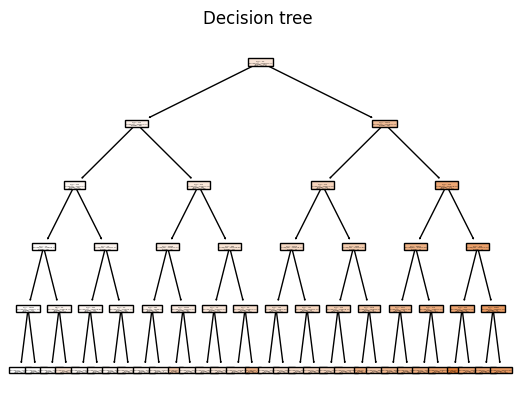

In [103]:
plt.figure()
tree.plot_tree(dt, filled=True)
plt.title("Decision tree ")
plt.show()